In [2]:
import pandas as pd
import numpy as np
import os
import random
import deepchem as dc
import tensorflow as tf

Skipped loading some Pytorch utilities, missing a dependency. No module named 'torch'


This module requires PyTorch to be installed.


No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!
No normalization for NumAmideBonds. Feature removed!
No normalization for NumAtomStereoCenters. Feature removed!
No normalization for NumBridgeheadAtoms. Feature removed!
No normalization for NumHeterocycles. Feature removed!
No normalization for NumSpiroAtoms. Feature removed!
No normalization for NumUnspecifiedAtomStereoCenters. Feature removed!
No normalization for Phi. Feature removed!


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


Skipped loading some PyTorch models, missing a dependency. No module named 'torch'
No module named 'torch'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch'
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'torch'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


In [ ]:
#ESOL Delaney Solubility dataset.

In [2]:
#Need to tidy this up into just one bit 

In [3]:
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer="GraphConv", splitter="random")
train_dataset, valid_dataset, test_dataset = datasets
print(train_dataset)

<DiskDataset X.shape: (np.int64(902),), y.shape: (np.int64(902), np.int64(1)), w.shape: (np.int64(902), np.int64(1)), ids: ['CN(C)C(=O)C(c1ccccc1)c2ccccc2 ' 'CCOC(=O)c1ccc(N)cc1'
 'FC(F)(Cl)C(F)(F)Cl' ... 'Cc1ccc(O)c(C)c1' 'CCSC(=O)N(CC(C)C)CC(C)C'
 'Cn1c(=O)n(C)c2nc[nH]c2c1=O'], task_names: ['measured log solubility in mols per litre']>


In [4]:
train_dataframe = train_dataset.to_dataframe()

In [5]:
train_dataframe

,X,y,w,ids
0,<deepchem.feat.mol_graphs.ConvMol object at 0x...,0.038124,1.0,CN(C)C(=O)C(c1ccccc1)c2ccccc2
1,<deepchem.feat.mol_graphs.ConvMol object at 0x...,0.210134,1.0,CCOC(=O)c1ccc(N)cc1
2,<deepchem.feat.mol_graphs.ConvMol object at 0x...,0.151537,1.0,FC(F)(Cl)C(F)(F)Cl
3,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-0.764750,1.0,Cc1cccc2c(C)cccc12
4,<deepchem.feat.mol_graphs.ConvMol object at 0x...,0.283853,1.0,CC(C)=CCC/C(C)=C\CO
...,...,...,...,...
897,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-0.694339,1.0,c1ccc(Cl)cc1C(c2ccc(Cl)cc2)(O)C(=O)OC(C)C
898,<deepchem.feat.mol_graphs.ConvMol object at 0x...,0.272512,1.0,Cc1[nH]c(=O)n(c(=O)c1Cl)C(C)(C)C
899,<deepchem.feat.mol_graphs.ConvMol object at 0x...,0.884000,1.0,Cc1ccc(O)c(C)c1
900,<deepchem.feat.mol_graphs.ConvMol object at 0x...,-0.292666,1.0,CCSC(=O)N(CC(C)C)CC(C)C


In [ ]:
#So now I need to extract the SMILES strings from the dataset
#So inputs need to be made a fixed size
#Featurising converts smiles into numeric, measuring interactions, etc. 
#Tidy this up into one bit 

In [6]:
from rdkit import Chem
print(dc.__version__)

2.8.0


In [7]:
from platform import python_version

print(python_version())

3.9.23


In [8]:
smiles = train_dataframe["ids"] 

In [9]:
print(smiles)

0                 CN(C)C(=O)C(c1ccccc1)c2ccccc2 
1                            CCOC(=O)c1ccc(N)cc1
2                             FC(F)(Cl)C(F)(F)Cl
3                             Cc1cccc2c(C)cccc12
4                            CC(C)=CCC/C(C)=C\CO
                         ...                    
897    c1ccc(Cl)cc1C(c2ccc(Cl)cc2)(O)C(=O)OC(C)C
898             Cc1[nH]c(=O)n(c(=O)c1Cl)C(C)(C)C
899                              Cc1ccc(O)c(C)c1
900                      CCSC(=O)N(CC(C)C)CC(C)C
901                   Cn1c(=O)n(C)c2nc[nH]c2c1=O
Name: ids, Length: 902, dtype: object


In [10]:
featurizer = dc.feat.CircularFingerprint(size=2048, radius=4)
features = featurizer.featurize(smiles)

[18:12:36] DEPRECATION WARNING: please use MorganGenerator
[18:12:36] DEPRECATION WARNING: please use MorganGenerator
[18:12:36] DEPRECATION WARNING: please use MorganGenerator
[18:12:36] DEPRECATION WARNING: please use MorganGenerator
[18:12:36] DEPRECATION WARNING: please use MorganGenerator
[18:12:36] DEPRECATION WARNING: please use MorganGenerator
[18:12:36] DEPRECATION WARNING: please use MorganGenerator
[18:12:36] DEPRECATION WARNING: please use MorganGenerator
[18:12:36] DEPRECATION WARNING: please use MorganGenerator
[18:12:36] DEPRECATION WARNING: please use MorganGenerator
[18:12:36] DEPRECATION WARNING: please use MorganGenerator
[18:12:36] DEPRECATION WARNING: please use MorganGenerator
[18:12:36] DEPRECATION WARNING: please use MorganGenerator
[18:12:36] DEPRECATION WARNING: please use MorganGenerator
[18:12:36] DEPRECATION WARNING: please use MorganGenerator
[18:12:36] DEPRECATION WARNING: please use MorganGenerator
[18:12:36] DEPRECATION WARNING: please use MorganGenerat

In [11]:
seed = random.seed(400)

In [23]:
#Have now featurized my SMILES data

In [25]:
#Now need to take the target solubility values. Solubility is Log valued 

In [12]:
solubility= train_dataframe["y"] 

In [ ]:
#smiles, features, solubility 

In [ ]:
#So now I need to Train test and split the data to determine how my model performs on new data

In [13]:
X = features

In [14]:
y = solubility

In [15]:
print(X)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
#Can either do random split or a scaffold split. Going to random using scikit learn

In [16]:
from sklearn.model_selection import train_test_split

In [ ]:
#Need to preserve alignment, so done together 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [ ]:
#so data is split into training and test datasets

In [18]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import cross_val_score

In [ ]:
#GBR used because my target y is a number and continous 

In [19]:
reg = GradientBoostingRegressor(random_state=seed)

In [24]:
reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
#My R2 value, tells me how well my model explains variance in solubility. Currently poorly 

In [25]:
cross_val_score(reg, X_train, y_train, cv=3, n_jobs=-1).mean()

np.float64(0.5730329869979865)

In [ ]:
#Hyperparametere tuning 

In [ ]:
#n_estimators number of trees, too few underfit, too many overfit
#learning_rate. How much each tree contributes to correcting errors
#max_depth maximum depth of each individual tree. Shallow udnerfit. Deep overfit
#min samples split. Minimum numbers of samples required to split a node
#min samples leaf. Minimum number of samples erquired to split a node
#subsample. Fraction of training data used for each tree

In [20]:
param_grid = {
    "n_estimators": [10, 50, 100, 500],
    "learning_rate": [0.0001, 0.001, 0.01, 0.1, 1.0],
    "max_depth":[3, 5, 7, 9],
    "min_samples_leaf": [1, 2, 3, 4, 5],
    "min_samples_split": [2, 4, 6, 8, 10], 
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0]
}


In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
reg2 = GridSearchCV(reg, param_grid, cv=3, n_jobs=-1)

In [23]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Switched to use randomised search to reduce time due to CPU intensity 

In [40]:
search = RandomizedSearchCV(reg, param_distributions= param_grid, n_iter=100, cv=3, n_jobs=-1, verbose=2)
search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1.0],
                                        'max_depth': [3, 5, 7, 9],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [10, 50, 100, 500],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   verbose=2)

In [41]:
search.best_params_

{'subsample': 0.7,
 'n_estimators': 500,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_depth': 7,
 'learning_rate': 0.1}

In [42]:
search.best_score_

np.float64(0.6802650971736407)

In [24]:
test_param_grid = {
    "n_estimators": [500],
    "learning_rate": [0.1],
    "max_depth":[7],
    "min_samples_leaf": [4],
    "min_samples_split": [6], 
    "subsample": [0.7]
}

In [ ]:
#Test set small enough to not randomly sample

In [25]:
test_regression = GridSearchCV(reg, test_param_grid, cv=3, n_jobs=-1)

In [26]:
test_regression.fit(X_test, y_test)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [7],
                         'min_samples_leaf': [4], 'min_samples_split': [6],
                         'n_estimators': [500], 'subsample': [0.7]})

In [27]:
predicted_solubility = test_regression.predict(X_test)

In [29]:
test_regression.best_score_

np.float64(0.3105228121689384)

In [30]:
import matplotlib.pyplot as plt

In [31]:
from sklearn import metrics

In [32]:
from sklearn.metrics import root_mean_squared_error

In [33]:
root_mean_squared_error(predicted_solubility, y_test)

0.059482440781762284

In [34]:
y_test

487    0.316932
146    0.609917
871    0.661426
870   -1.690016
172   -1.483509
         ...   
6     -2.334111
804   -1.956066
73     0.638271
163   -0.481689
155    0.743178
Name: y, Length: 181, dtype: float64

In [35]:
from sklearn.metrics import r2_score

In [36]:
r2_score(predicted_solubility, y_test)

0.9961554120328425

In [37]:
print(predicted_solubility.shape, y_test.shape)

(181,) (181,)


In [38]:
print(type(predicted_solubility), type(y_test))

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


In [39]:
import numpy as np

In [40]:
print("NaNs:", np.isnan(y_test).any())
print("Infs:", np.isinf(y_test).any())

NaNs: False
Infs: False


In [41]:
print("NaNs:", np.isnan(np.array(predicted_solubility)).any())
print("Infs:", np.isinf(np.array(predicted_solubility)).any())

NaNs: False
Infs: False


In [42]:
print(y_test.dtype)

float64


In [43]:
print(predicted_solubility.dtype)

float64


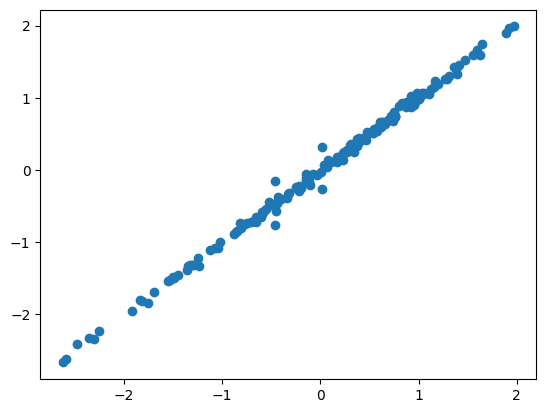

In [44]:
plt.scatter(np.array(predicted_solubility), y_test)

In [ ]:
#residual plot
#histogram
#Feature importance
#Predicted vs true line of equality
#error vs molecular size?

In [45]:
import seaborn as sns

In [49]:
resi_df = {"Predicted" : predicted_solubility, "Actual" : y_test}
residual_df = pd.DataFrame(data=resi_df)

<Axes: xlabel='Predicted', ylabel='Actual'>

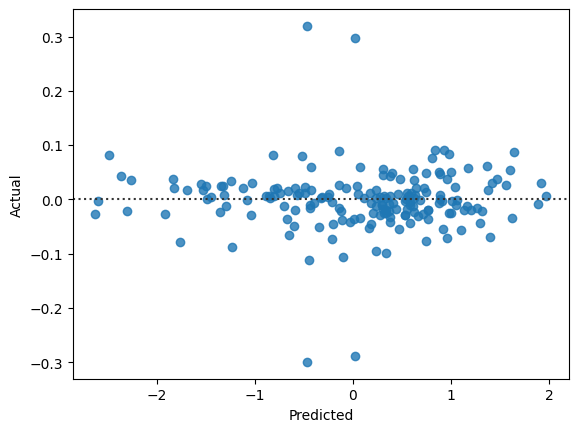

In [51]:
sns.residplot(x="Predicted", y="Actual", data=residual_df)

In [56]:
estimator =test_regression.best_estimator_

In [59]:
importances = estimator.feature_importances_

In [63]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]

In [64]:
importances = pd.Series(importances, index=feature_names)

NameError: name 'std' is not defined

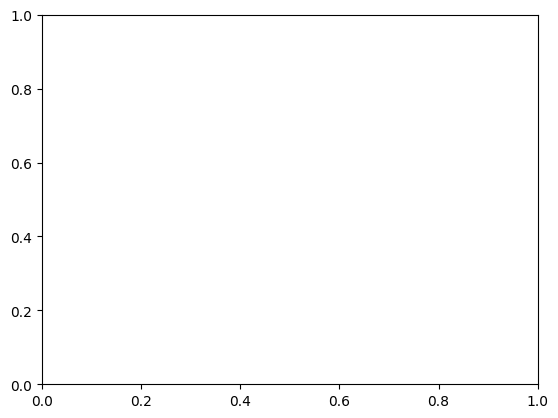

In [67]:
fig, ax = plt.subplots()
importances.plot.bar(yerr=std, ax=ax)